In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics as st
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

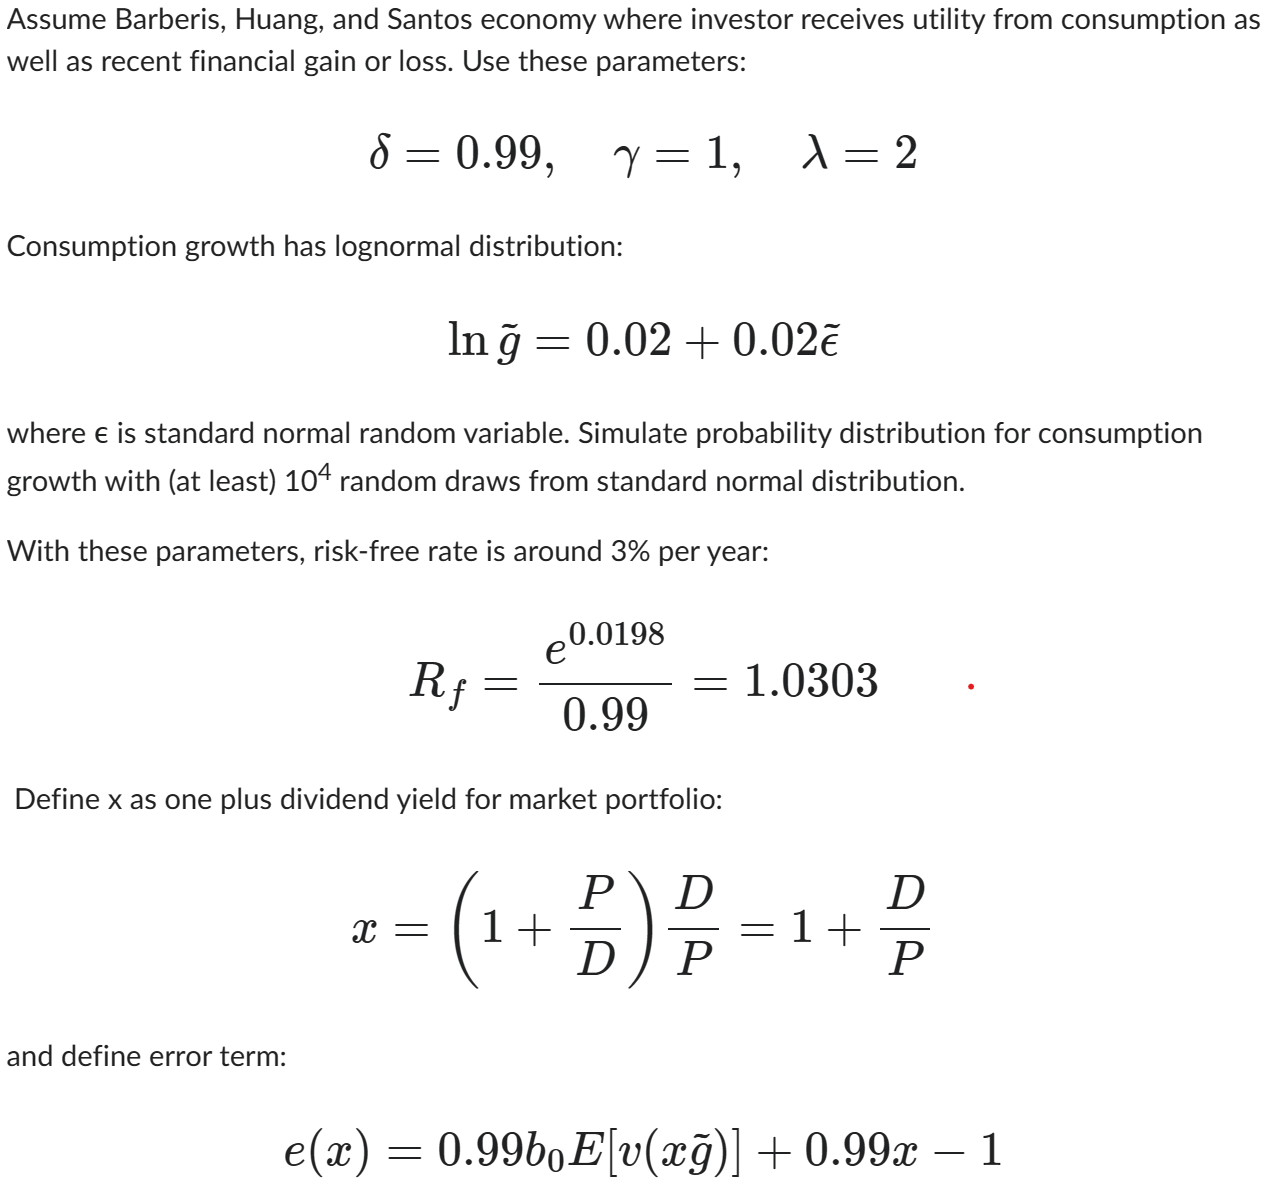

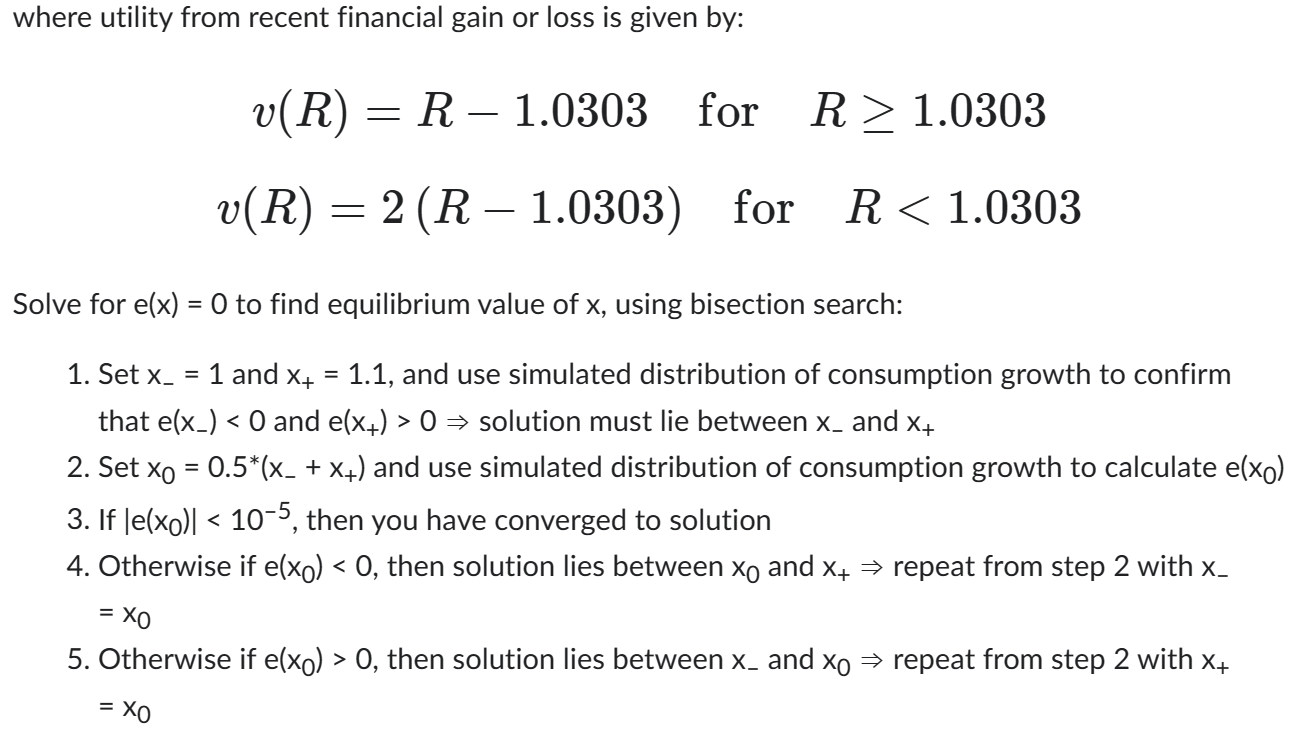

In [2]:
# consumption growth (g = e^(0.02 + 0.02ϵ))
simulation = 100000
consumption_growth_list = []
for i in range(simulation):
    epsilon = np.random.standard_normal()
    consumption_growth = np.exp(0.02 + 0.02*epsilon)

    consumption_growth_list.append(consumption_growth)

In [3]:
# subjective discount factor
delta = 0.99

# risk-free rate
rf = 1.0303

#b0
b0 = np.arange(0, 10.1, 0.1);

In [4]:
# error term
def e(b0,x):
    vlist=np.mean([utility(x*i) for i in consumption_growth_list])
    return delta*b0*vlist+delta*x-1

In [5]:
# utility from financial gain/loss
def utility(R):
    if R>rf:
        return R-rf
    if R<rf:
        return 2*(R-rf)

In [6]:
# x = 1 + dividend yield

# bisection search function 
def bisection(x_lower, x_upper, b0):
    x=(x_lower+x_upper)/2
    if (abs(e(b0,x))<10**(-5)):
        return x
    elif e(b0,x)<0:
        x_lower=x
        return bisection(x_lower,x_upper,b0)
    elif e(b0,x)>0:
        x_upper=x
        return bisection(x_lower,x_upper,b0)

# x parameter
x_lower=1
x_upper=1.1

# compute x 
xlist=[bisection(x_lower,x_upper,b0) for b0 in b0]

In [11]:
np.array(xlist)

array([1.01010742, 1.01077881, 1.01130371, 1.01171875, 1.01204834,
       1.0123291 , 1.01256714, 1.01276855, 1.01294556, 1.01309814,
       1.01323242, 1.01335449, 1.01346436, 1.01355591, 1.01364746,
       1.01372681, 1.01380005, 1.01386719, 1.01392822, 1.01398315,
       1.01403809, 1.01408691, 1.01412964, 1.01417236, 1.01421204,
       1.01425171, 1.01428528, 1.01431885, 1.01434937, 1.01437988,
       1.0144043 , 1.01443176, 1.01445618, 1.01448059, 1.01450195,
       1.01452637, 1.01454468, 1.01456604, 1.01458435, 1.01460266,
       1.01461792, 1.01463623, 1.01465149, 1.01466675, 1.01468201,
       1.01469421, 1.01470947, 1.01472168, 1.01473389, 1.01474609,
       1.0147583 , 1.01476746, 1.01477966, 1.01478882, 1.01480103,
       1.01481018, 1.01481934, 1.01482849, 1.01483765, 1.0148468 ,
       1.01485443, 1.01486206, 1.01487122, 1.01487885, 1.01488647,
       1.01489258, 1.01490021, 1.01490784, 1.01491394, 1.01492004,
       1.01492615, 1.01493225, 1.01493835, 1.01494446, 1.01495

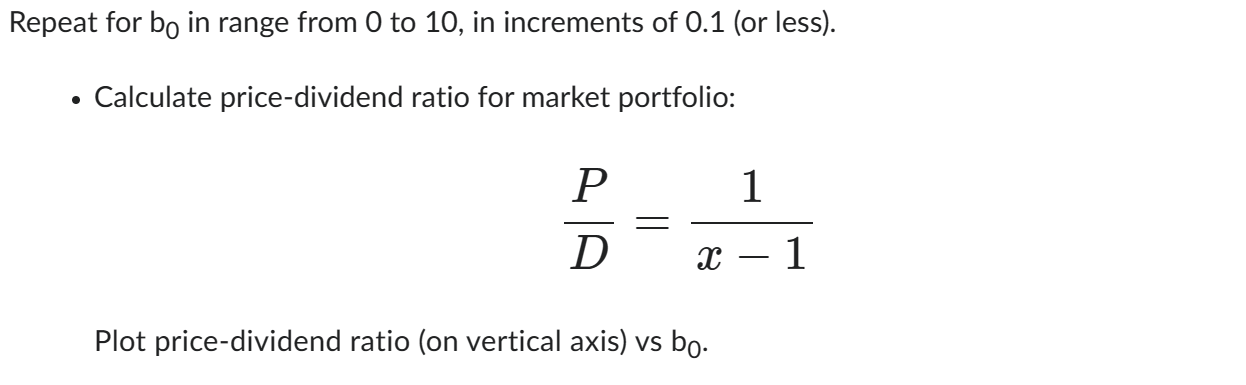

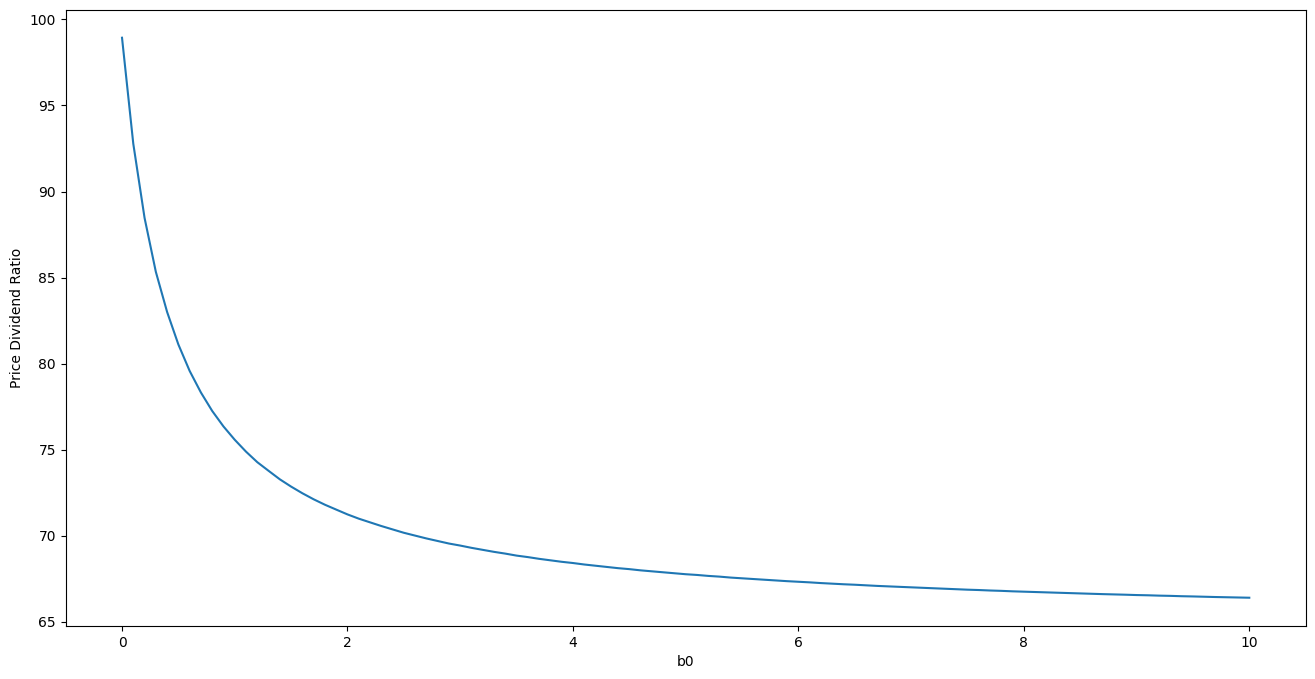

In [8]:
# compute price dividend ratio
price_dividend_ratio = 1/(np.array(xlist)-1)

# plot price-dividend ratio
plt.figure(figsize=(16,8))
plt.plot(b0, price_dividend_ratio)  

plt.xlabel('b0')
plt.ylabel('Price Dividend Ratio')
plt.show()

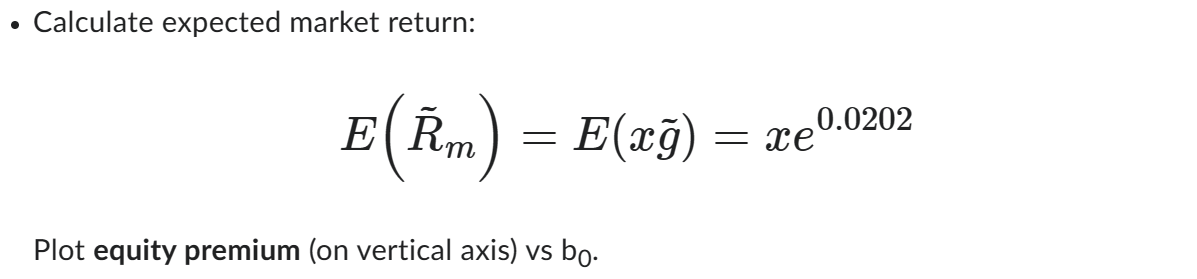

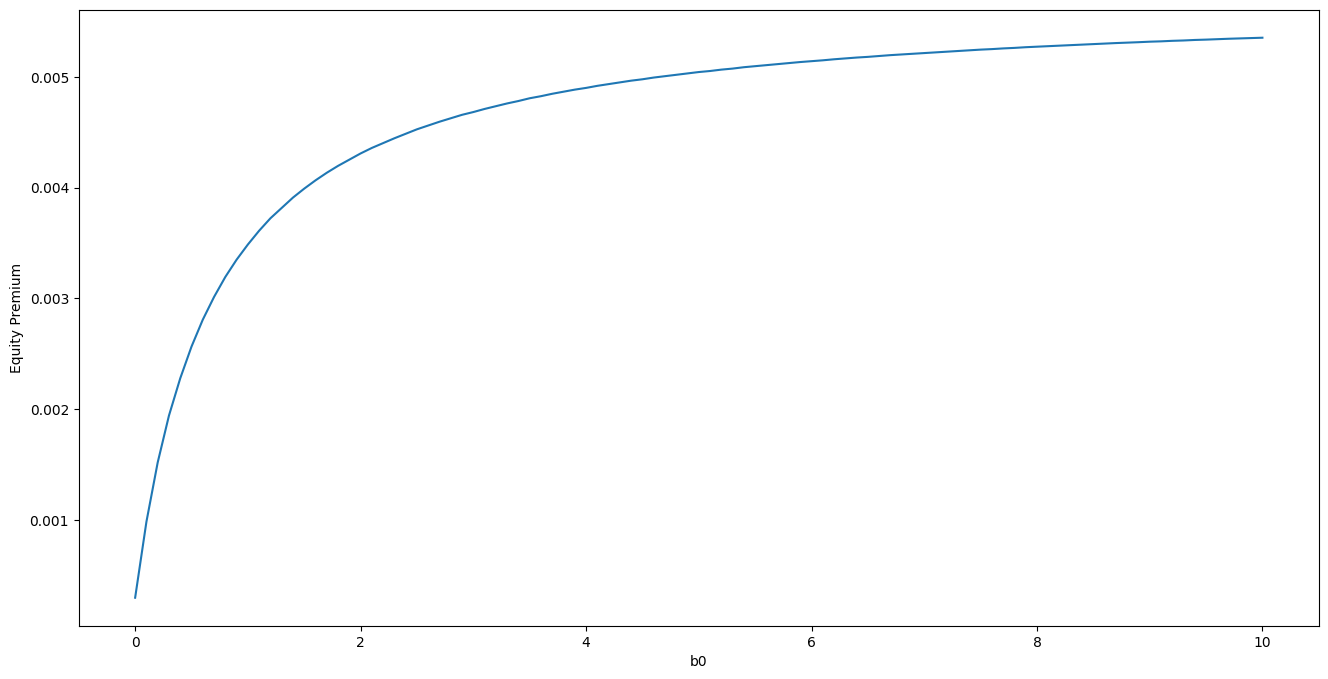

In [9]:
# compute expected market return 
market_return = np.array([np.mean([m*n for n in consumption_growth_list]) for m in xlist])

# compute equity premium
equity_premium = market_return - rf

#plot equity premium
plt.figure(figsize=(16,8))
plt.plot(b0, equity_premium) 

plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.show()

In [ ]:
# compute expected market return 
## same result
market_return = np.array([np.mean([m*np.exp(0.0202)]) for m in xlist])

# compute equity premium
equity_premium = market_return - rf

#plot equity premium
plt.figure(figsize=(16,8))
plt.plot(b0, equity_premium) 

plt.xlabel('b0')
plt.ylabel('Equity Premium')
plt.show()

### Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.

The utility function v(∙) provides a realistic model of investor behaviour. The gain or loss is measured relative to reference level. The investor is more sensitive to loss than compared to gain, more sensitive to downside risk which is represented by λ. 

b0 determines the extent to which utility from recent financial gain or loss contributes to the investor's lifetime utility. if b0 is 0, recent financial gain or loss will not effect the utility and the utility will stay as a power utility. A higher value of b0 means the investors place more weight on recent financial gains and losses when making investment decisions. As b0 increases, the price to dividend ratio decreases and the equity premium increases concavely.

λ is the degree of loss aversion. As λ increases above 1, it indicates a stronger aversion to losses and the downside risk increases.